In [1]:
%load_ext autoreload
%autoreload 1
import io
import tifffile
import zarr
import glob
import os
from imgaug import augmenters as iaa
import imgaug as ia
from imgaug.augmentables.segmaps import SegmentationMapsOnImage
import numpy as np
import skimage
import torch
from torch.utils.data import Dataset
from imgaug import augmenters as iaa
import matplotlib.pyplot as plt
from embeddingutils.transforms import Segmentation2AffinitiesWithPadding

In [2]:
from defects_dlmbl.unetmodule import UNetModuleWithBCEAux

from defects_dlmbl.datamodules import NMJDataModule
from defects_dlmbl.datasets import NMJDataset
import pytorch_lightning as pl
import argparse
from imgaug import augmenters as iaa
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint
import os

In [3]:
data_path = '/home/delsignores/defects_DLMBL/data/NMJ_training_data_crop/'
offsets = [[-1,0],[0,-1],[-9,0],[0,-9]]
img_dir = 'images_block_1'

In [4]:
dm = NMJDataModule(data_path, augmenter=None, offsets = offsets)

In [5]:
dm.setup()
td = dm.train_dataloader()

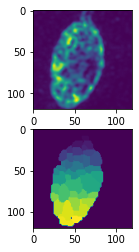

In [6]:
for image in td:
    fig, ax = plt.subplots(2, 1)
    ax[0].imshow(image[0][0][0])
    ax[1].imshow(image[2][0][0])
    break

In [7]:
model = UNetModuleWithBCEAux(offsets=offsets, image_dir=img_dir)

In [8]:
trainer = pl.Trainer()

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/delsignores/.local/lib/python3.7/site-packages/pytorch_lightning/trainer/trainer.py:1304: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  "GPU available but not used. Set the gpus flag in your trainer"


In [9]:
for batch in td:
    print(model.training_step(batch, 0))
    break

NameError: name 'plt' is not defined

In [ ]:
#plt.imshow(NMJ[0][1][0])

In [ ]:
ds = NMJDataset(data_path)

In [ ]:
ds[1][2].shape

In [ ]:
ds[1][2].shape

In [ ]:
plt.imshow(ds[2][2][0])

In [ ]:
plt.imshow(ds[3][2][0])

In [ ]:
img=ds[0][0]
gt=ds[0][2][0]

In [ ]:
imgt=np.transpose(img)

In [ ]:
imgt.shape

In [ ]:
img.shape

In [ ]:
imgt1=imgt.moveaxis(2,0)

In [ ]:
imgt1.shape

In [ ]:
a=np.zeros((3,2,2))

In [ ]:
b=np.moveaxis(a,2,0)